Accuracy: 1.0
              precision    recall  f1-score   support

    Advanced       1.00      1.00      1.00        65
       Basic       1.00      1.00      1.00        67
Intermediate       1.00      1.00      1.00        68

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



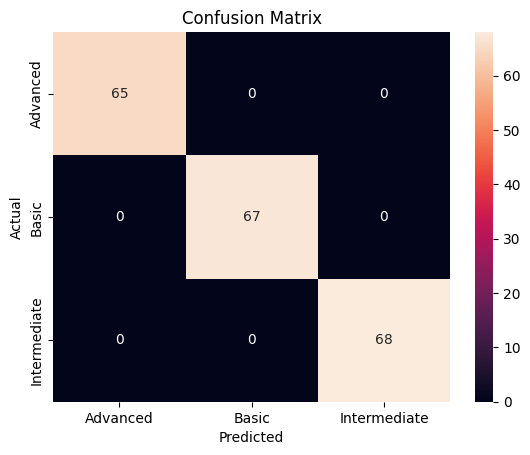

Predicted Skill Level:
Advanced

Why?:
Modulo operations are used, suggesting Modular Arithmetic or Number Theory.

Auto Tags:
['Strings', 'Palindrome']

Suggested Path based on Problem Statement:
['Strings', 'Dynamic Programming', 'Segment Trees', 'Palindrome', 'Graphs']

Suggested Path based on Skill Level:
['Dynamic Programming', 'Segment Trees', 'Graphs']



In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# Load dataset
df = pd.read_csv('sample_problem_dataset.csv')

# Drop nulls
df.dropna(inplace=True)

# Encode difficulty and skill_level
le_diff = LabelEncoder()
le_skill = LabelEncoder()
df['difficulty'] = le_diff.fit_transform(df['difficulty'])
df['skill_level'] = le_skill.fit_transform(df['skill_level'])

# Combine text
df['text'] = df['problem_name'] + " " + df['description']

# TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=500)
X_text = tfidf.fit_transform(df['text']).toarray()
X_numeric = df[['difficulty', 'max_score']].values
X = np.concatenate((X_text, X_numeric), axis=1)
y = df['skill_level']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le_skill.classes_))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=le_skill.classes_, yticklabels=le_skill.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Tagging and helper functions
def explain_prediction(text):
    text = text.lower()

    explanation_map = [
        ("subarray" in text or "maximum" in text, 
         "Likely involves Dynamic Programming due to subarray or max value optimization."),

        ("binary tree" in text or "tree" in text, 
         "This involves Tree traversal such as DFS/BFS."),

        ("graph" in text or "shortest path" in text or "dijkstra" in text or "floyd" in text, 
         "This involves Graph algorithms such as BFS, DFS, or shortest path algorithms."),

        ("sort" in text, 
         "Sorting techniques are likely required here."),

        ("recursion" in text or "backtrack" in text, 
         "Problem likely involves recursion or backtracking strategies."),

        ("heap" in text or "priority queue" in text, 
         "Heaps or Priority Queues are involved."),

        ("greedy" in text, 
         "A greedy strategy might be optimal for this problem."),

        ("sliding window" in text, 
         "Uses the Sliding Window technique for optimal subarray or sequence handling."),

        ("binary search" in text, 
         "Binary Search technique is likely applicable."),

        ("prefix sum" in text, 
         "Prefix Sum is used to compute cumulative values efficiently."),

        ("segment tree" in text, 
         "This requires efficient range queries, likely using Segment Trees."),

        ("trie" in text, 
         "Problem involves prefix searches, likely requiring a Trie data structure."),

        ("modulo" in text or "mod", 
         "Modulo operations are used, suggesting Modular Arithmetic or Number Theory."),
    ]

    for condition, explanation in explanation_map:
        if condition:
            return explanation

    return "This problem requires general algorithmic and problem-solving skills."


def auto_tag_problem(text):
    tags = []
    text = text.lower()

    keyword_map = {
        "array": "Arrays",
        "matrix": "Matrix",
        "string": "Strings",
        "tree": "Trees",
        "binary tree": "Trees",
        "graph": "Graphs",
        "bfs": "DFS/BFS",
        "dfs": "DFS/BFS",
        "backtrack": "Backtracking",
        "recursion": "Recursion",
        "dp": "Dynamic Programming",
        "dynamic programming": "Dynamic Programming",
        "hash": "Hashing",
        "stack": "Stacks",
        "queue": "Queues",
        "priority queue": "Heaps",
        "heap": "Heaps",
        "greedy": "Greedy",
        "sliding window": "Sliding Window",
        "two pointer": "Two Pointers",
        "binary search": "Binary Search",
        "prefix sum": "Prefix Sum",
        "segment tree": "Segment Tree",
        "trie": "Trie",
        "divide and conquer": "Divide and Conquer",
        "sort": "Sorting",
        "search": "Search",
        "math": "Mathematics",
        "number theory": "Number Theory",
        "geometry": "Geometry",
        "bitwise": "Bit Manipulation",
        "modulo": "Modular Arithmetic",
        "lcs": "Dynamic Programming",
        "knapsack": "Dynamic Programming",
        "shortest path": "Graphs",
        "dijkstra": "Graphs",
        "floyd warshall": "Graphs",
        "topo": "Topological Sort",
        "cycle": "Cycle Detection",
        "palindrome": "Palindrome",
        "roman": "Strings",
        "gcd": "Number Theory",
        "lcm": "Number Theory"
    }

    for keyword, tag in keyword_map.items():
        if keyword in text and tag not in tags:
            tags.append(tag)

    return tags


def suggest_learning_path(skill_label):
    if isinstance(skill_label, int):
        skill_label = le_skill.inverse_transform([skill_label])[0]
    if skill_label == 'Basic':
        return ['Loops', 'Arrays', 'Functions']
    elif skill_label == 'Intermediate':
        return ['Recursion', 'Sorting', 'HashMaps']
    else:
        return ['Dynamic Programming', 'Graphs', 'Segment Trees']
    

def get_suggested_path(tags):
    path_map = {
        "Arrays": ["Basics of Arrays", "2D Arrays", "Sliding Window"],
        "Strings": ["String Manipulation", "KMP Algorithm", "Trie"],
        "Trees": ["Tree Traversal", "Binary Search Tree", "Segment Tree"],
        "Graphs": ["BFS/DFS", "Shortest Path", "Union Find", "Topological Sort"],
        "Dynamic Programming": ["Memoization", "Tabulation", "Knapsack Problems"],
        "DFS/BFS": ["Recursive DFS", "Iterative BFS", "Connected Components"],
        "Backtracking": ["Recursion Basics", "N-Queens", "Sudoku Solver"],
        "Hashing": ["HashMap", "HashSet", "Frequency Counting"],
        "Heaps": ["Min Heap", "Max Heap", "Dijkstra's Algorithm"],
        "Greedy": ["Greedy Choice Property", "Activity Selection", "Huffman Coding"],
        "Two Pointers": ["Two Pointer Technique", "Fast/Slow Pointers"],
        "Binary Search": ["Binary Search Basics", "Search in Rotated Array"],
        "Segment Tree": ["Range Queries", "Lazy Propagation"],
        "Trie": ["Trie Basics", "Word Search"],
        "Sorting": ["QuickSort", "MergeSort", "Counting Sort"],
        "Mathematics": ["Basic Math", "GCD/LCM", "Modulo Arithmetic"],
        "Bit Manipulation": ["Bitwise Operators", "Set/Unset Bits", "XOR Tricks"],
        "Number Theory": ["Prime Numbers", "Sieve of Eratosthenes", "Modular Inverse"]
    }

    suggested = []
    for tag in tags:
        if tag in path_map:
            suggested.extend(path_map[tag])
    return list(set(suggested))


def full_pipeline(problem_name, description, difficulty, max_score, tfidf, model, le_skill):
    text = problem_name + " " + description
    text_vec = tfidf.transform([text]).toarray()
    input_data = np.concatenate((text_vec, [[difficulty, max_score]]), axis=1)
    predicted_skill = model.predict(input_data)[0]

    skill_label = le_skill.inverse_transform([predicted_skill])[0]
    explanation = explain_prediction(text)
    tags = auto_tag_problem(text)
    path = suggest_learning_path(skill_label)

    # 🔧 Generate suggested path based on problem's tags
    suggested = []
    for tag in tags:
        suggested.extend(suggest_learning_path(tag))  # This assumes function supports tag names too
    suggested = list(set(suggested))  # Deduplicate

    return {
        "Predicted Skill Level": skill_label,
        "Why?": explanation,
        "Auto Tags": tags,
        "Suggested Path based on Problem Statement": list(set(path + tags)),
        "Suggested Path based on Skill Level": suggested
    }

result = full_pipeline(
    "Longest Palindromic Substring",
    "Given a string, find the longest substring which is a palindrome.",
    1, 20, tfidf, model, le_skill
)

for key, value in result.items():
    print(f"{key}:\n{value}\n")


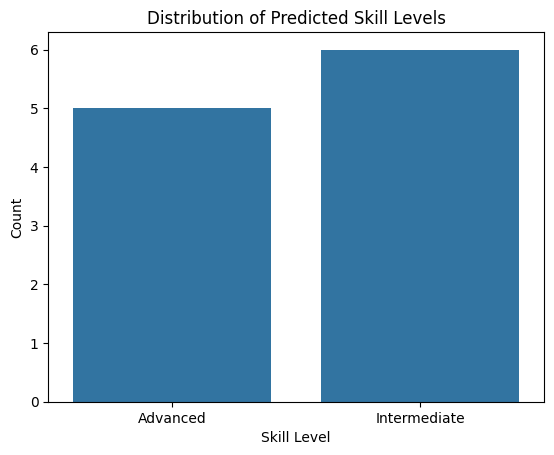

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample problems covering all levels
sample_problems = [
    # Beginner
    ("Print Even Numbers", "Write a program to print even numbers from 1 to N.", 1, 5),
    ("Sum of Array", "Calculate the sum of all elements in an array.", 1, 10),
    ("Reverse a String", "Given a string, return its reverse.", 1, 8),
    ("Add Two Numbers", "Write a function to add two numbers and return the result.", 1, 5),
    ("Check Even or Odd", "Determine if a number is even or odd.", 1, 3),
   

    # Intermediate
    ("Longest Increasing Subsequence", "Find the length of the longest increasing subsequence.", 2, 45),
    ("Balanced Parentheses", "Check if an expression has balanced parentheses using stack.", 2, 40),
    ("Min Stack", "Design a stack that supports push, pop, top, and retrieving the minimum element.", 2, 50),

    # Advanced
    ("Dijkstra Algorithm", "Implement Dijkstra's algorithm for shortest path in a graph.", 3, 90),
    ("Word Ladder", "Transform one word to another using dictionary transformations.", 3, 85),
    ("K-th Smallest in BST", "Find the k-th smallest element in a Binary Search Tree.", 3, 80),
]

predicted_labels = []

# Predict for each sample
for name, desc, diff, score in sample_problems:
    text = name + " " + desc
    text_vec = tfidf.transform([text]).toarray()
    input_data = np.concatenate((text_vec, [[diff, score]]), axis=1)
    pred = model.predict(input_data)[0]
    predicted_labels.append(le_skill.inverse_transform([pred])[0])  # Convert back to label

# Plot skill level distribution
sns.countplot(x=predicted_labels, order=sorted(set(predicted_labels)))
plt.title("Distribution of Predicted Skill Levels")
plt.xlabel("Skill Level")
plt.ylabel("Count")
plt.show()
